In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data_to_model/data_with_winsorized_merged_age_0.01.csv', index_col=0)

In [4]:
# 유치원, 초등학교 수 합치기
df['유치원_초등학교'] = df['유치원수'] + df['초등학교수']

In [5]:
df_2 = pd.read_csv('./data_to_model/연령별 인구수 비율.csv', index_col= 0)

In [6]:
df_2['남자_10대이하'] = df_2['1_0대'] + df_2['1_10대']
df_2['남자_20_30대'] = df_2['1_20대'] + df_2['1_30대']
df_2['남자_40_60대'] = df_2['1_40대'] + df_2['1_50대'] + df_2['1_60대']
df_2['남자_70대이상'] = df_2['1_70대'] + df_2['1_80대'] + df_2['1_90대'] + df_2['1_기타']

df_2['여자_10대이하'] = df_2['2_0대'] + df_2['2_10대']
df_2['여자_20_30대'] = df_2['2_20대'] + df_2['2_30대']
df_2['여자_40_60대'] = df_2['2_40대'] + df_2['2_50대'] + df_2['2_60대']
df_2['여자_70대이상'] = df_2['2_70대'] + df_2['2_80대'] + df_2['2_90대'] + df_2['2_기타']

In [7]:
df_2['총_10대이하'] = df_2['1_0대'] + df_2['1_10대'] + df_2['2_0대'] + df_2['2_10대']
df_2['총_20_30대'] = df_2['1_20대'] + df_2['1_30대'] + df_2['2_20대'] + df_2['2_30대']
df_2['총_40_60대'] = df_2['1_40대'] + df_2['1_50대'] + df_2['1_60대'] + df_2['2_40대'] + df_2['2_50대'] + df_2['2_60대']
df_2['총_70대이상'] = df_2['1_70대'] + df_2['1_80대'] + df_2['1_90대'] + df_2['1_기타'] +  df_2['2_70대'] + df_2['2_80대'] + df_2['2_90대'] + df_2['2_기타']

In [8]:
# feature = ['2023년09월_1인세대', '남자_10대이하', '남자_20_30대', '남자_40_60대', '남자_70대이상', '여자_10대이하','여자_20_30대', '여자_40_60대', '여자_70대이상',
#            '미세먼지지수',  '공원수', '도시농업(프로그램수)','1점포당_1년_매출액', '승하차인원_버스_지하철', '카페수', '유치원_초등학교']
feature = ['미세먼지지수',  '공원수', '도시농업(프로그램수)','1점포당_1년_매출액', '승하차인원_버스_지하철', '카페수', '유치원_초등학교', '인구수']

In [10]:
feature2 = [#'총_10대이하', 
            '총_20_30대', 
            #'총_40_60대',
              '총_70대이상']

In [15]:
df = df[feature]
df.head()

,미세먼지지수,공원수,도시농업(프로그램수),1점포당_1년_매출액,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수
가락1동,16,2,0,117503246,184724,43,3,55068
가락2동,16,9,0,33727171,190052,74,6,62654
가락본동,16,9,0,30568803,273627,99,4,50842
가리봉동,15,0,0,8641575,230955,11,1,8932
가산동,17,3,0,71356018,940108,239,1,49292


In [16]:
df_2 = df_2[feature2]
df_2.head()

,총_20_30대,총_70대이상
가락1동,0.272572,0.080192
가락2동,0.277141,0.086124
가락본동,0.319067,0.096416
가리봉동,0.376141,0.212660
가산동,0.546052,0.072101


In [60]:
final_df_before_scailing = pd.concat([df, df_2], axis=1)
final_df_before_scailing = final_df_before_scailing.fillna(0)
final_df_before_scailing.head()

,미세먼지지수,공원수,도시농업(프로그램수),1점포당_1년_매출액,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_20_30대,총_70대이상
가락1동,16,2,0,117503246,184724,43,3,55068,0.272572,0.080192
가락2동,16,9,0,33727171,190052,74,6,62654,0.277141,0.086124
가락본동,16,9,0,30568803,273627,99,4,50842,0.319067,0.096416
가리봉동,15,0,0,8641575,230955,11,1,8932,0.376141,0.212660
가산동,17,3,0,71356018,940108,239,1,49292,0.546052,0.072101


In [18]:
final_df_before_scailing.columns

Index(['미세먼지지수', '공원수', '도시농업(프로그램수)', '1점포당_1년_매출액', '승하차인원_버스_지하철', '카페수',
       '유치원_초등학교', '인구수', '총_20_30대', '총_70대이상'],
      dtype='object')

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
final_df = pd.DataFrame(scaler.fit_transform(final_df_before_scailing))
final_df.index = final_df_before_scailing.index
final_df.head()

,0,1,2,3,4,5,6,7,8,9
가락1동,0.038168,0.1250,0.0,0.574693,0.111698,0.141221,0.272727,0.592166,0.236062,0.150165
가락2동,0.038168,0.5625,0.0,0.154381,0.116483,0.259542,0.545455,0.682428,0.244966,0.178103
가락본동,0.038168,0.5625,0.0,0.138535,0.191531,0.354962,0.363636,0.541883,0.326675,0.226578
가리봉동,0.030534,0.0000,0.0,0.028524,0.153212,0.019084,0.090909,0.043215,0.437907,0.774051
가산동,0.045802,0.1875,0.0,0.343168,0.790014,0.889313,0.090909,0.523440,0.769046,0.112059


In [30]:
from sklearn.decomposition import TruncatedSVD, PCA

pca = PCA(n_components=3)
pca.fit(final_df)
pca_infra = pd.DataFrame((pca.transform(final_df)))

num_of_principal = pca_infra.shape[1] 
print('주성분의 개수:', num_of_principal)
pca_infra.index = df.index  
pca_infra.head()

주성분의 개수: 3


,0,1,2
가락1동,-0.013208,-0.084597,-0.119702
가락2동,0.375214,-0.238035,-0.134399
가락본동,0.263866,-0.038421,-0.142068
가리봉동,-0.588996,0.071116,0.070035
가산동,0.351054,0.800156,-0.403002


In [31]:
print('주성분의 설명력')
for i in range(num_of_principal) :
    print(f"제 {i+1}주성분 :", pca.explained_variance_ratio_[i])

주성분의 설명력
제 1주성분 : 0.27994269947654027
제 2주성분 : 0.1911387043128749
제 3주성분 : 0.13669795901081708


In [32]:
pca_infra_T = pca_infra.reset_index().copy()

pca_infra_T.columns = ['V_' + str(x) for x in pca_infra_T.columns]

In [34]:
pca_infra_T.columns

Index(['V_index', 'V_0', 'V_1', 'V_2'], dtype='object')

<Axes: xlabel='V_0', ylabel='V_1'>

c:\Users\user\anaconda3\envs\mecab\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


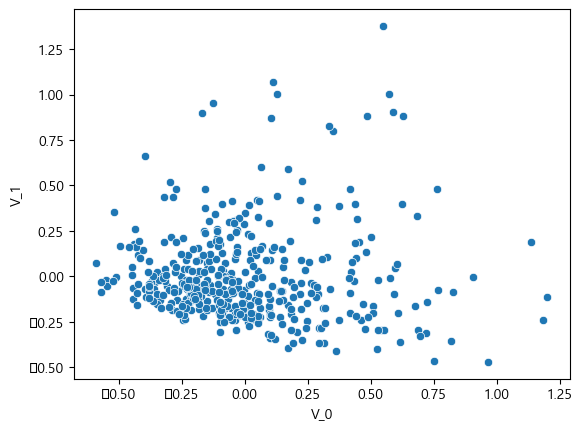

In [33]:
import seaborn as sns
sns.scatterplot(data = pca_infra_T.reset_index(), x = 'V_0', y = 'V_1')

In [35]:
pca_infra_T.sort_values('V_0').head(10)

,V_index,V_0,V_1,V_2
3,가리봉동,-0.588996,0.071116,0.070035
15,개포1동,-0.569225,-0.085834,0.100297
320,이촌2동,-0.567847,-0.031411,0.057297
91,둔촌1동,-0.548613,-0.019360,0.028687
223,숭인1동,-0.547408,-0.053154,0.062113
377,창신2동,-0.522569,-0.024096,0.062662
170,삼청동,-0.519604,0.351997,0.079133
376,창신1동,-0.510329,-0.000995,0.060676
345,장충동,-0.492642,0.165602,-0.008349
299,용산2가동,-0.457121,0.160353,0.014109


In [36]:
pca_infra_T.sort_values('V_0').tail(10)

,V_index,V_0,V_1,V_2
116,목5동,0.749931,-0.465826,-0.146693
279,여의동,0.764749,0.482084,-0.317570
410,화곡1동,0.768564,-0.077755,-0.244242
27,공릉2동,0.818923,-0.354641,-0.205108
210,세곡동,0.828410,-0.083995,0.554259
83,독산1동,0.905269,-0.006141,0.353442
259,신정3동,0.965633,-0.470734,-0.160109
185,상암동,1.136838,0.188385,0.716435
370,진관동,1.182528,-0.241306,-0.227011
275,양재1동,1.200014,-0.114696,-0.228298


In [37]:
pca_infra_T.sort_values('V_1').head(10)

,V_index,V_0,V_1,V_2
259,신정3동,0.965633,-0.470734,-0.160109
116,목5동,0.749931,-0.465826,-0.146693
358,중계2.3동,0.363932,-0.408409,-0.046366
172,상계1동,0.526689,-0.401958,-0.101674
306,월계2동,0.170672,-0.394951,0.001846
291,오류2동,0.293883,-0.369048,0.068596
37,구산동,0.316912,-0.368121,-0.066240
307,월계3동,0.190401,-0.364535,-0.042100
46,길음1동,0.618094,-0.363587,-0.121075
27,공릉2동,0.818923,-0.354641,-0.205108


In [38]:
pca_infra_T.sort_values('V_1').tail(10)

,V_index,V_0,V_1,V_2
162,사직동,0.104885,0.871953,-0.084287
280,역삼1동,0.484083,0.880985,-0.391256
189,서교동,0.629967,0.882745,-0.381505
30,광희동,-0.168595,0.896597,0.219874
263,신촌동,0.590505,0.906782,-0.389953
420,회현동,-0.126240,0.956210,-0.052395
211,소공동,0.130790,1.000847,0.185613
287,영등포동,0.572036,1.002702,-0.336824
109,명동,0.113928,1.069351,-0.085649
354,종로1.2.3.4가동,0.548646,1.377703,0.758025


V_0 : 2030, 카페, 유동인구, 미세먼지지수 +
10대이하, 4060, 공원수

--> 도심지역(+) 대비 거주지역(-)

V_1 : +일수록 전반적인 시설이 많이 형성된 지역이고 - 일수록 낙후시설 

In [40]:
pd.DataFrame(data=pca.components_, columns=final_df.columns).T
pca_infra.columns.astype('string')

,0,1,2
미세먼지지수,0.044315,0.484531,0.026617
공원수,0.478215,-0.139271,0.022938
도시농업(프로그램수),0.207535,0.157890,0.931855
1점포당_1년_매출액,0.042534,0.063631,-0.014194
승하차인원_버스_지하철,0.366239,0.459233,-0.099125
카페수,0.257173,0.454972,-0.180885
유치원_초등학교,0.435588,-0.366590,0.012406
인구수,0.556284,-0.246736,-0.172495
총_20_30대,0.027321,0.311191,-0.166340
총_70대이상,-0.155766,-0.082790,0.173455


c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

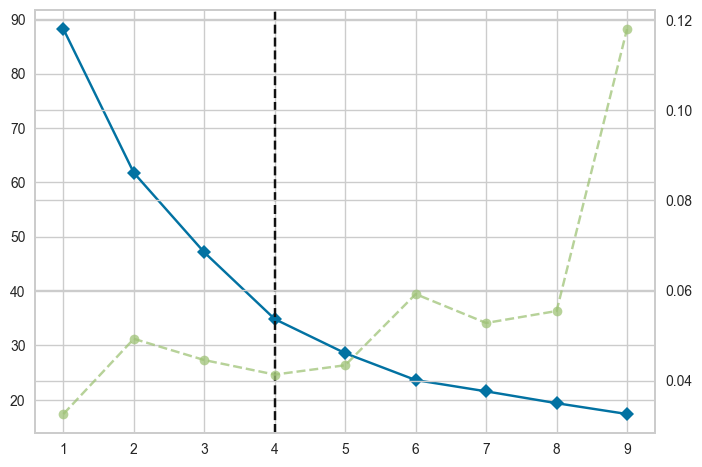

In [44]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score


#엘보우 최적 클러스터 수 정하기
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10), n_init=10)
visualizer.fit(pca_infra)

In [45]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [46]:
def silhouette_avg(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    return cluster_labels, yticks, silhoutte_avg

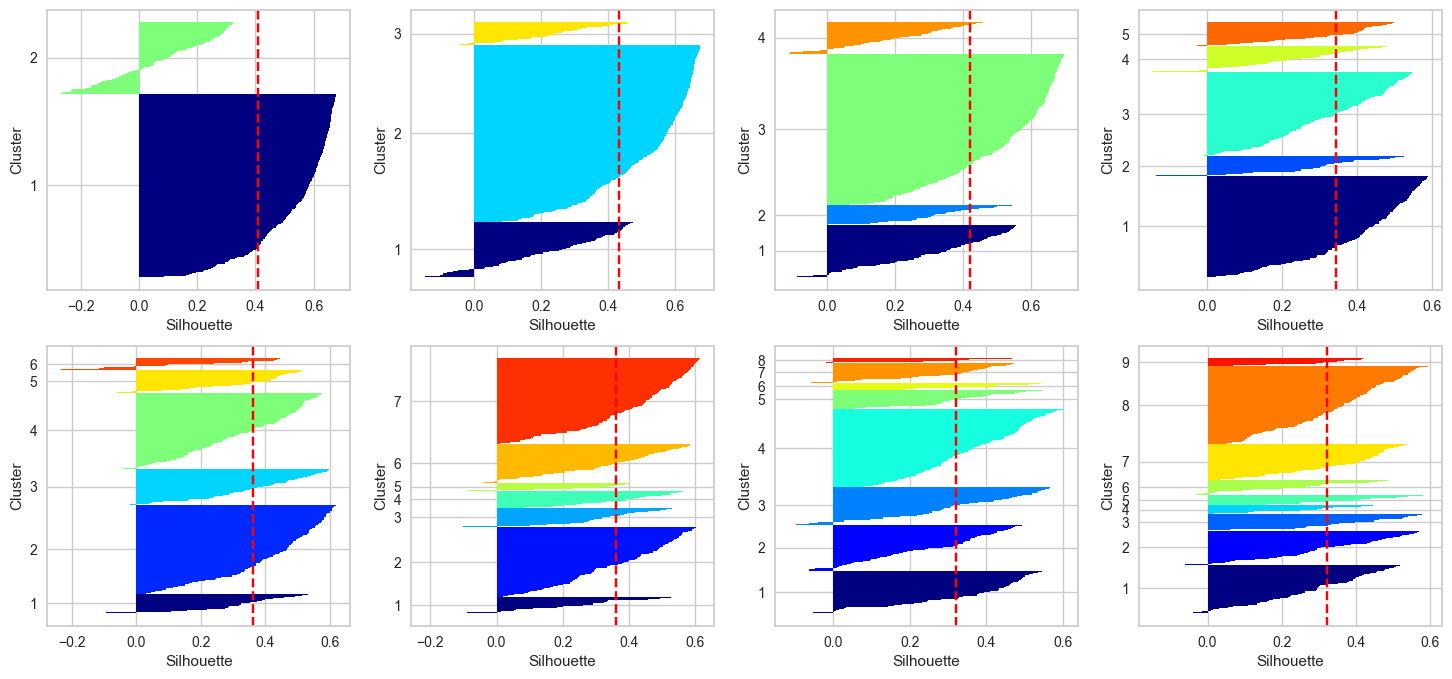

In [47]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

nrows, ncols = 2, 4
fig, ax = plt.subplots(nrows=nrows,
                       ncols=ncols,
                       figsize=(18,8))
for i, n_cluster in enumerate(n_clusters):
    kmeans= KMeans(n_clusters=n_cluster,
                   n_init=10,
                    init='k-means++',
                    max_iter=300,
                    random_state=0)
    kmeans.fit(pca_infra)

    
    plt.subplot(nrows, ncols, i+1)
    cluster_labels, yticks, silhoutte_score = silhouette_avg(pca_infra, kmeans.labels_)
    
    plt.axvline(silhoutte_score, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette')
    
plt.show()

c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


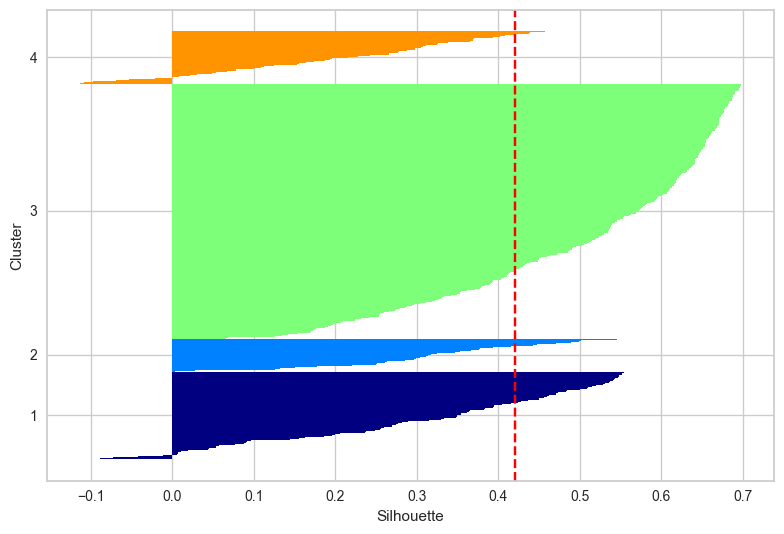

In [48]:
kmeans = KMeans(n_clusters=4,       # 클러스터 개수 4개
                init='k-means++',   # K-means 알고리즘 설정
                max_iter=300,       # 최대 몇번 반복
                random_state=0)

y_km = kmeans.fit_predict(pca_infra)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

#실루엣 분석
silhouette_vals = silhouette_samples(pca_infra, y_km, metric = 'euclidean')

#시각화
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels) :
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0,
             edgecolor = 'none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

#라벨링
pca_infra['cluster'] = kmeans.labels_
#실루엣계수 평균값
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color = 'red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette')

plt.tight_layout()
plt.show()

In [49]:
pca_infra

,0,1,2,cluster
가락1동,-0.013208,-0.084597,-0.119702,2
가락2동,0.375214,-0.238035,-0.134399,0
가락본동,0.263866,-0.038421,-0.142068,0
가리봉동,-0.588996,0.071116,0.070035,2
가산동,0.351054,0.800156,-0.403002,3
...,...,...,...,...
효창동,-0.384411,0.025572,-0.025728,2
후암동,-0.227884,-0.058513,-0.032734,2
휘경1동,-0.270577,0.190004,-0.100173,2
휘경2동,0.052480,-0.136422,-0.098513,2


In [50]:
for i in range(4):
    print(f"cluster_{i}의 개수: {len(pca_infra[pca_infra['cluster'] == i].index)}개")

cluster_0의 개수: 87개
cluster_1의 개수: 33개
cluster_2의 개수: 254개
cluster_3의 개수: 52개


In [52]:
pca_infra[pca_infra['cluster'] == 0].head()

,0,1,2,cluster
가락2동,0.375214,-0.238035,-0.134399,0
가락본동,0.263866,-0.038421,-0.142068,0
가양1동,0.684317,0.333496,-0.356268,0
갈현2동,0.139626,-0.221228,-0.080714,0
개포2동,0.312814,-0.175344,-0.054692,0


<Axes: xlabel='V_0', ylabel='V_1'>

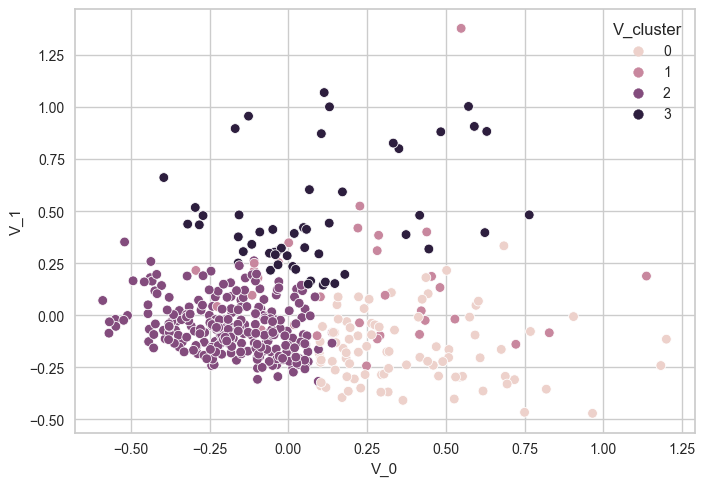

In [53]:
pca_infra_T = pca_infra.reset_index().copy()

pca_infra_T.columns = ['V_' + str(x) for x in pca_infra_T.columns]

sns.scatterplot(data = pca_infra_T.reset_index(), x = 'V_0', y = 'V_1', hue = 'V_cluster')

<Axes: xlabel='V_0', ylabel='V_2'>

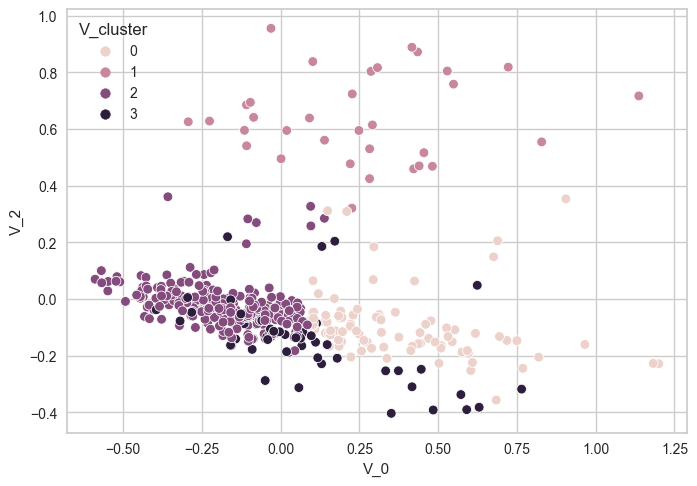

In [54]:
sns.scatterplot(data = pca_infra_T.reset_index(), x = 'V_0', y = 'V_2', hue = 'V_cluster')

<Axes: xlabel='V_1', ylabel='V_2'>

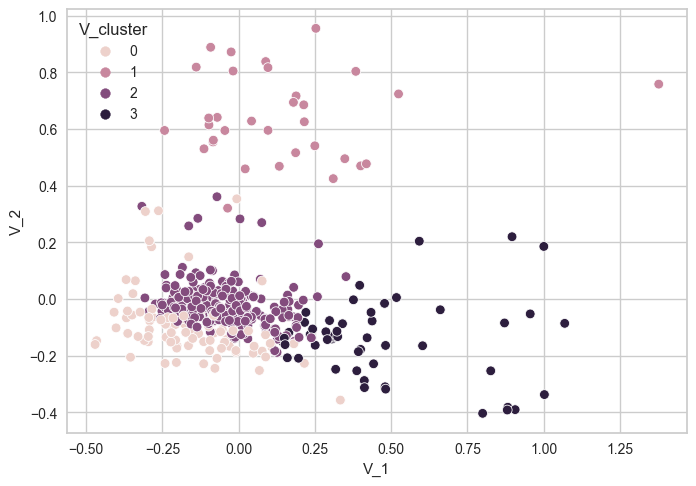

In [55]:
sns.scatterplot(data = pca_infra_T.reset_index(), x = 'V_1', y = 'V_2', hue = 'V_cluster')

In [57]:
pca_infra

,0,1,2,cluster
가락1동,-0.013208,-0.084597,-0.119702,2
가락2동,0.375214,-0.238035,-0.134399,0
가락본동,0.263866,-0.038421,-0.142068,0
가리봉동,-0.588996,0.071116,0.070035,2
가산동,0.351054,0.800156,-0.403002,3
...,...,...,...,...
효창동,-0.384411,0.025572,-0.025728,2
후암동,-0.227884,-0.058513,-0.032734,2
휘경1동,-0.270577,0.190004,-0.100173,2
휘경2동,0.052480,-0.136422,-0.098513,2


In [71]:
# 피처별 순위 계산 (1~426등)
def rank(data):
    for col in data.columns:
        data[col] = data[col].rank(ascending=False).astype('int')
    return data

In [121]:
cluster_0 = final_df_before_scailing.loc[pca_infra[pca_infra['cluster'] == 0].index, :]
cluster_0

,미세먼지지수,공원수,도시농업(프로그램수),1점포당_1년_매출액,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_20_30대,총_70대이상
가락2동,16,9,0,33727171,190052,74,6,62654,0.277141,0.086124
가락본동,16,9,0,30568803,273627,99,4,50842,0.319067,0.096416
가양1동,30,12,0,17159849,453464,218,4,68158,0.492327,0.056721
갈현2동,13,4,0,17906347,245983,53,6,55418,0.274387,0.129056
개포2동,33,12,0,60217692,298994,26,6,38769,0.247105,0.075885
...,...,...,...,...,...,...,...,...,...,...
홍은2동,13,5,0,40243996,551429,40,3,57516,0.285729,0.127999
홍제1동,11,7,0,28011990,431459,24,5,49746,0.268846,0.131789
화곡1동,14,13,0,49924860,614122,80,5,89344,0.386306,0.109587
화곡본동,14,14,0,56253539,239559,36,6,66802,0.355947,0.097542


In [125]:
ranked_cluster_0 = cluster_0.copy()
ranked_cluster_0 = rank(ranked_cluster_0)
ranked_cluster_0['sum'] = ranked_cluster_0.sum(axis=1).astype('int')
ranked_cluster_0['ranking'] = ranked_cluster_0['sum'].rank(ascending=False)
ranked_cluster_0.sort_values('ranking').head(5)

,미세먼지지수,공원수,도시농업(프로그램수),1점포당_1년_매출액,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_20_30대,총_70대이상,sum,ranking
중계1동,60,63,47,23,73,66,71,64,87,85,639,1.0
자양3동,60,82,47,84,80,42,43,61,49,55,603,2.0
월계2동,78,44,47,85,75,87,31,67,76,6,596,3.0
신정7동,60,75,47,33,85,73,43,57,82,29,584,4.0
잠원동,86,26,47,47,34,49,85,65,63,75,577,5.0


In [134]:
ranked_cluster_0.sort_values('ranking').head(5).index

Index(['중계1동', '자양3동', '월계2동', '신정7동', '잠원동'], dtype='object')

In [ ]:
ranked_cluster_0.sort_values('ranking').head(5)

In [127]:
cluster_1 = final_df_before_scailing.loc[pca_infra[pca_infra['cluster'] == 1].index, :]
ranked_cluster_1 = cluster_1.copy()
ranked_cluster_1 = rank(ranked_cluster_1)
ranked_cluster_1['sum'] = ranked_cluster_1.sum(axis=1).astype('int')
ranked_cluster_1['ranking'] = ranked_cluster_1['sum'].rank(ascending=False)
ranked_cluster_1.sort_values('ranking').head(5)

,미세먼지지수,공원수,도시농업(프로그램수),1점포당_1년_매출액,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_20_30대,총_70대이상,sum,ranking
신정6동,25,9,22,19,31,27,27,14,32,33,239,1.0
망우3동,17,20,22,32,32,30,20,25,23,9,230,2.0
암사2동,25,28,22,14,33,26,20,31,10,18,227,3.0
성내1동,12,24,22,26,30,10,20,30,17,24,215,4.0
서빙고동,4,24,6,33,25,33,20,27,25,16,213,5.0


In [128]:
cluster_2 = final_df_before_scailing.loc[pca_infra[pca_infra['cluster'] == 2].index, :]
ranked_cluster_2 = cluster_2.copy()
ranked_cluster_2 = rank(ranked_cluster_2)
ranked_cluster_2['sum'] = ranked_cluster_2.sum(axis=1).astype('int')
ranked_cluster_2['ranking'] = ranked_cluster_2['sum'].rank(ascending=False)
ranked_cluster_2.sort_values('ranking').head(5)

,미세먼지지수,공원수,도시농업(프로그램수),1점포당_1년_매출액,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_20_30대,총_70대이상,sum,ranking
금호1가동,243,206,131,223,197,191,177,162,171,150,1851,1.0
신월6동,163,156,131,210,241,184,177,178,155,242,1837,2.0
창신2동,163,156,131,248,185,217,247,240,194,35,1816,3.0
암사3동,163,76,131,113,239,184,227,233,231,213,1810,4.0
둔촌1동,59,241,131,113,252,252,177,253,91,221,1790,5.0


In [129]:
cluster_3 = final_df_before_scailing.loc[pca_infra[pca_infra['cluster'] == 3].index, :]
ranked_cluster_3 = cluster_3.copy()
ranked_cluster_3 = rank(ranked_cluster_3)
ranked_cluster_3['sum'] = ranked_cluster_3.sum(axis=1).astype('int')
ranked_cluster_3['ranking'] = ranked_cluster_3['sum'].rank(ascending=False)
ranked_cluster_3.sort_values('ranking').head(5)

,미세먼지지수,공원수,도시농업(프로그램수),1점포당_1년_매출액,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_20_30대,총_70대이상,sum,ranking
한남동,50,50,28,44,16,31,28,25,40,17,329,1.0
연남동,46,38,28,51,52,9,28,35,17,24,328,2.0
대치4동,35,38,28,21,37,17,28,41,36,46,327,3.0
아현동,24,16,28,39,40,48,41,8,39,42,325,4.0
이화동,27,38,28,41,36,29,49,43,24,8,323,5.0


In [130]:
cluster_0.head(5)

,미세먼지지수,공원수,도시농업(프로그램수),1점포당_1년_매출액,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_20_30대,총_70대이상
가락2동,16,9,0,33727171,190052,74,6,62654,0.277141,0.086124
가락본동,16,9,0,30568803,273627,99,4,50842,0.319067,0.096416
가양1동,30,12,0,17159849,453464,218,4,68158,0.492327,0.056721
갈현2동,13,4,0,17906347,245983,53,6,55418,0.274387,0.129056
개포2동,33,12,0,60217692,298994,26,6,38769,0.247105,0.075885


In [131]:
cluster_1.head(5)

,미세먼지지수,공원수,도시농업(프로그램수),1점포당_1년_매출액,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_20_30대,총_70대이상
강일동,32,8,2,81688655,262007,20,7,32811,0.230715,0.111304
공항동,98,7,2,29454607,239768,53,6,60020,0.295868,0.093269
구로2동,15,3,2,52872289,610995,39,2,22803,0.271616,0.260635
낙성대동,17,5,3,16507747,650121,52,1,35022,0.557935,0.081206
내곡동,50,14,1,13549867,184435,38,3,34682,0.232455,0.129058


In [132]:
cluster_2.head(5)

,미세먼지지수,공원수,도시농업(프로그램수),1점포당_1년_매출액,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_20_30대,총_70대이상
가락1동,16,2,0,117503246,184724,43,3,55068,0.272572,0.080192
가리봉동,15,0,0,8641575,230955,11,1,8932,0.376141,0.212660
가양2동,15,5,0,30928029,90113,12,4,27236,0.264283,0.208841
가양3동,15,3,0,53256287,67861,9,5,28826,0.299174,0.179699
가회동,47,1,0,74544906,139554,73,2,7820,0.239898,0.157801


In [133]:
cluster_3.head(5)

,미세먼지지수,공원수,도시농업(프로그램수),1점포당_1년_매출액,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_20_30대,총_70대이상
가산동,17,3,0,71356018,940108,239,1,49292,0.546052,0.072101
광희동,129,3,1,24959126,412314,135,0,11362,0.415948,0.131491
구로3동,15,2,0,56884086,490330,118,5,23339,0.411154,0.190201
남영동,75,3,0,40261178,579478,55,0,13926,0.265259,0.135861
논현1동,12,2,0,40780965,573781,122,2,21261,0.435916,0.094257
